
# Project: Investigate a Dataset - [no_show_appointments]




## Introduction
> this notebook has an anlysis for (no_show_appointments) datasset.This dataset for 100k medical appointments in Brazi. from this dataset we will be able to answer some questions about this dataset .we will ne able to know:
  1. what are What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
  2. what is the percent of patients who missed their scheduled appointment?
  3. what is the gender distribution for show and no-show patients?
  4. are there patients had more than one appointment?
  5. how many patients whose thier ScheduledDay on the same day?

### Dataset Description 

> .This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Dataset columns 
 	        
1. PatienID:	        ( number )	      identification of a patient.
2. AppointmentID:	 ( number )	      identification of each appointment.
3. Gender:	         ( F or M )	      it says 'F' if female or 'M' if man.
4. ScheduledDay:	     ( date )	          tells us on what day the patient set up their appointment.
5. AppointmentDay:	 ( date )	          the day of the actuall appointment, when they have to visit the doctor.
6. Age:              ( number )	       how old is the patient.
7. Neighbourhood:	  ( string )	      indicates the location of the hospital
8. Scholarship:    	  ( 0 or 1 )	      indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa >   Família
9. Hipertension:	  ( 0 or 1 )	      indicates if the patient has hipertension
10. Diabetes:	     ( 0 or 1 )	      indicates if the patient has diabetes
11. Alcoholism:	     ( 0 or 1 )	      indicates if the patient is an alcoholic
12. Handcap:	         ( 0 or 1 )	      indicates if the patient is handicaped
13. SMS_received:	  ( 0 or 1 )	      1 or more messages sent to the patient
14. No-show:	          ( Yes or No )	      it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up





In [2]:
#liberaries_used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import datetime



<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# get the shape of dataset
df.shape

(110527, 14)

In [5]:
# list the columns in dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
# get a view on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>there are some observation for this dataset:
  1. this dataset has not nun_values.
  2. Age: the average age of patients is 37 and most of them are less than 55 years old and there is age lees than 0 but this  is not possible.
  3. SMS_received: 75% of people had recieved sms for appointment.
  4. Handcap: there are 4 classes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e2a03f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e2808828>]], dtype=object)

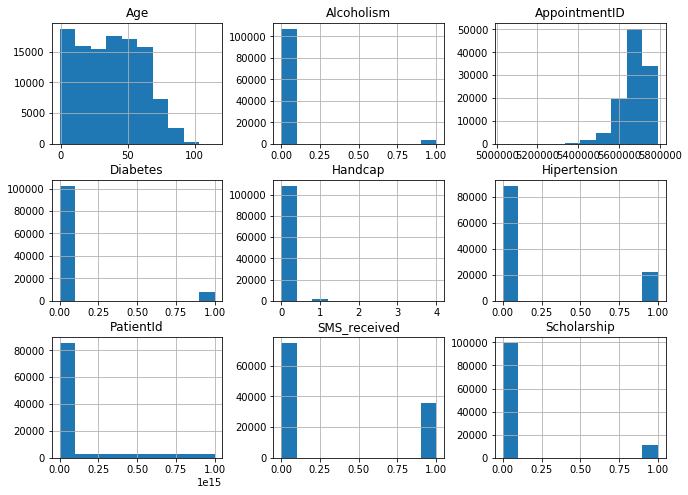

In [8]:
#visualize data
df.hist(figsize=(11,8))

>some other obsevations:
1. most of people are not alcoholics.
2. most of people are not diabetes.
3. most of people have not hipertension.
4. most of people are not enrolled in Brasilian welfare program Bolsa Família.


### Data Cleaning

 

>there are some cleaning should be performed for this dataset:
   1. column['PatientId'] has float values and should be converted to int 
   2. columns['ScheduledDay','AppointmentDay'] have string values and should be converted to datetime
   3. we could see that column['Age'] has some values less than 0 and that's not possible so we will remove them  



In [9]:
# convert ['ScheduledDay','AppointmentDay'] to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [10]:
#build new column for waiting days
df['waiting_days']=df['AppointmentDay'].dt.day-df['ScheduledDay'].dt.day
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2


Text(0.5,1,'the distibution of waiting day for patients')

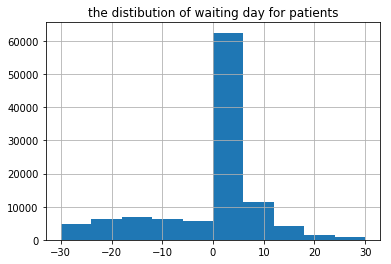

In [11]:
df.waiting_days.hist()
plt.title("the distibution of waiting day for patients")

In [12]:
# convert ['PatientId'] to int
df['PatientId']=df['PatientId'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
waiting_days      110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(3)
memory usage: 12.6+ MB


In [13]:
#get ages less than 0
invalid_age=df[df.Age<0]
invalid_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


In [14]:
#remove un valid ages (ages less than 0)
df=df[df.Age>=0] 

<a id='eda'></a>
## Exploratory Data Analysis


### Questions
  1. what are What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
  2. what is the percent of patients who missed their scheduled appointment?
  3. what is the gender distribution for show and no-show patients?
  4. are there patients had more than one appointment?
  5. how many patients whose thier ScheduledDay on the same day?

###  1.  what are What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> we will know if there are some features affect the distribution of show\ no-show. and if there are ,we will be able to know how this factoe affect in our dataset. this helps us to predict if a patient will show up for their scheduled appointment?

In [17]:
# group data by no-show and calculate counts for each class
grouped_data=df.groupby(['No-show']).count()
grouped_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,waiting_days
No-show,,,,,,,,,,,,,,
No,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [22]:
# group data by no-show and calculate counts for each class
mean_data=df.groupby(['No-show']).mean()
mean_data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,waiting_days
No-show,,,,,,,,,,
No,1.476809e+14,5.681135e+06,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,-1.551124
Yes,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,-2.550069


In [19]:
#build a function to plot how some features affect on show\no-show patients
def plot_data(factor):
    """
    this function take features of data as factor and groub data by this feature 
    and return plots for this feature effct on show\ no-show """
    df.groupby([factor])['No-show'].value_counts().unstack('No-show').plot(kind='bar',figsize=(20,10))
    plt.xlabel(factor)
    plt.ylabel('Propotion')
    plt.title(f"Propotion of show \ no-show by {factor}",fontsize=12)
    plt.show()

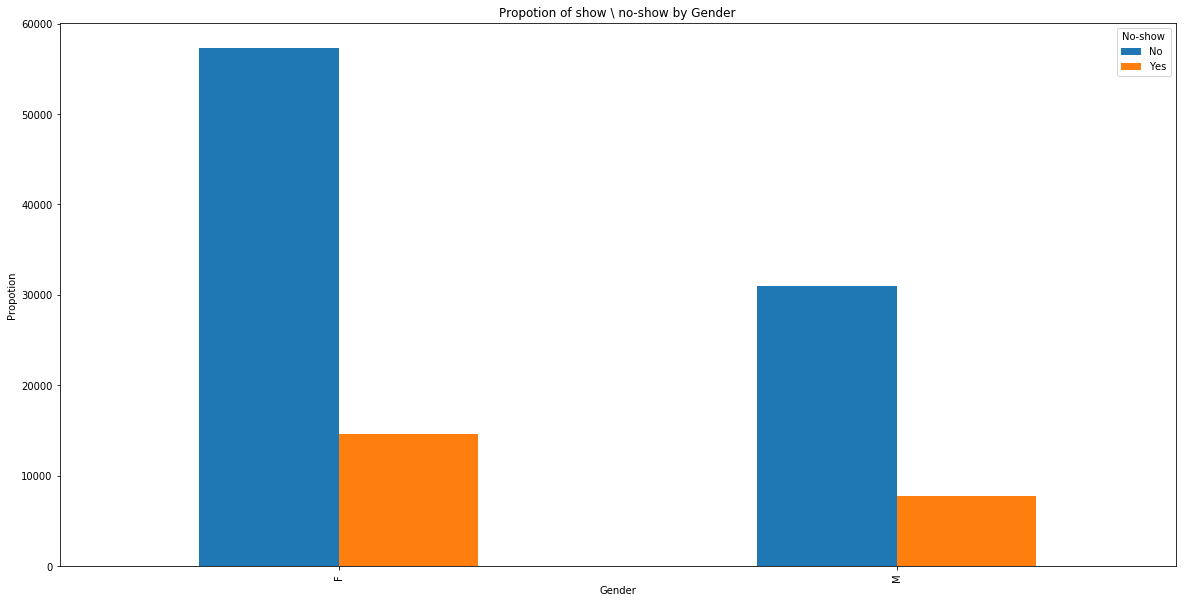

In [89]:
#show how gender affect on propotion show\no-show patients
plot_data('Gender')


>> from this we can see that females show thier ScheduledDay more than males

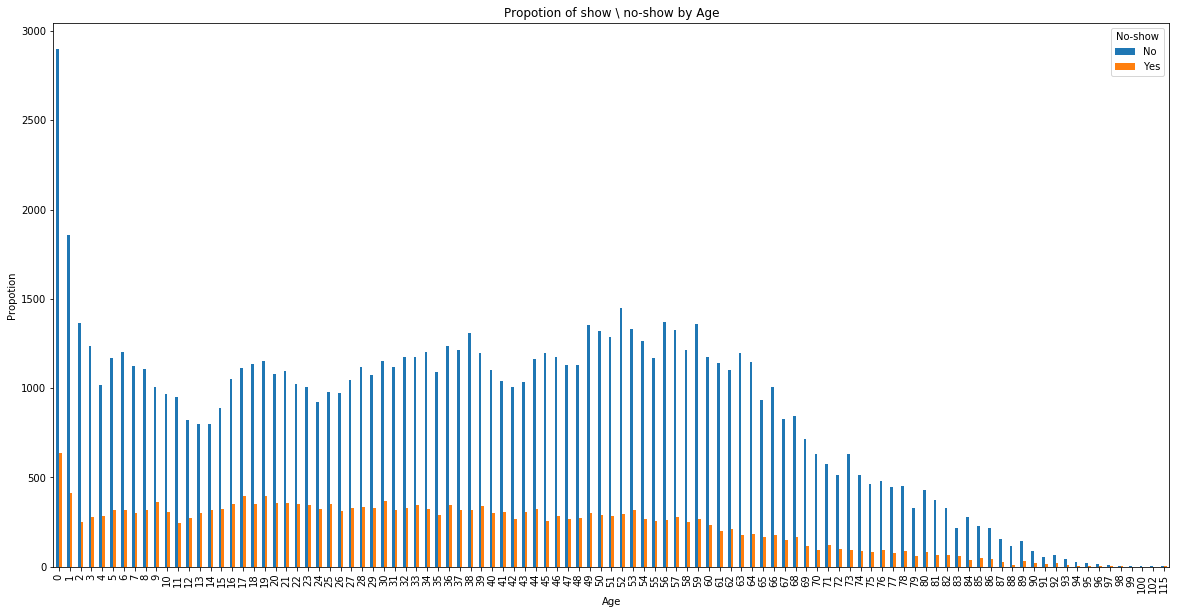

In [90]:
#show how Age affect on propotion show\no-show patients
plot_data('Age')

>> from this we can see that the young patients show thier ScheduledDay more than older patients. 

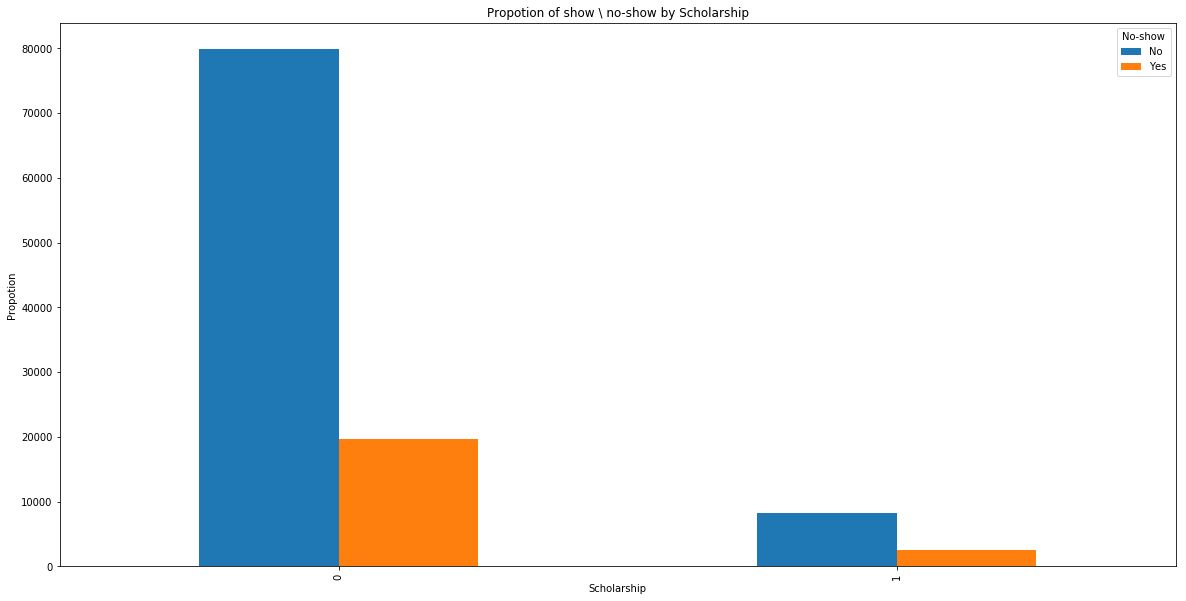

In [91]:
#show how Scholarship affect on propotion show\no-show patients
plot_data('Scholarship')

>> from this we can see that patients not enrolled in Brasilian welfare program Bolsa > Família show thier ScheduledDay more than others

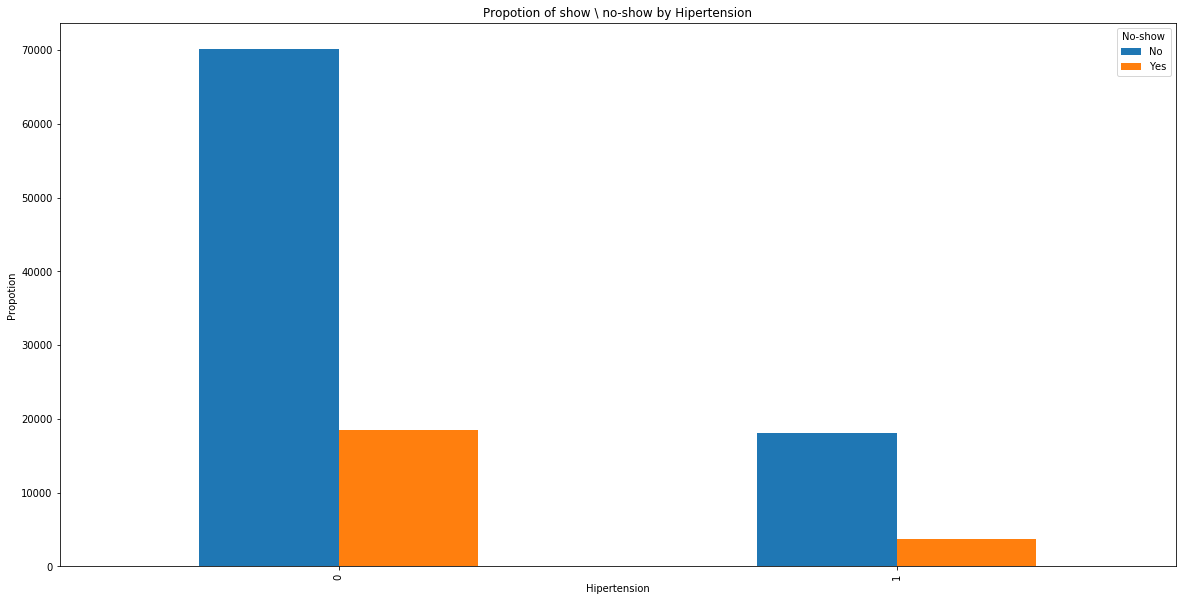

In [92]:
#show how Hipertension affect on propotion show\no-show patients
plot_data('Hipertension')

>> from this we can see that patient with no Hipertension show thier ScheduledDay more than others

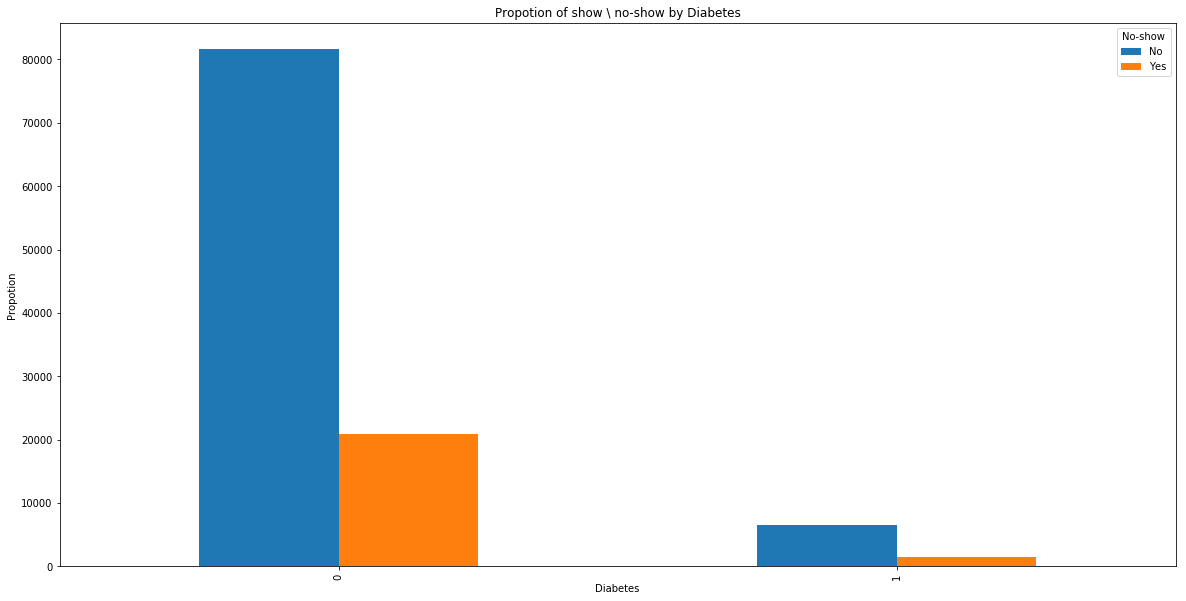

In [93]:
#show how Diabetes affect on propotion show\no-show patients
plot_data('Diabetes')

>> from this we can see that patient with no Diabetes show thier ScheduledDay more than others

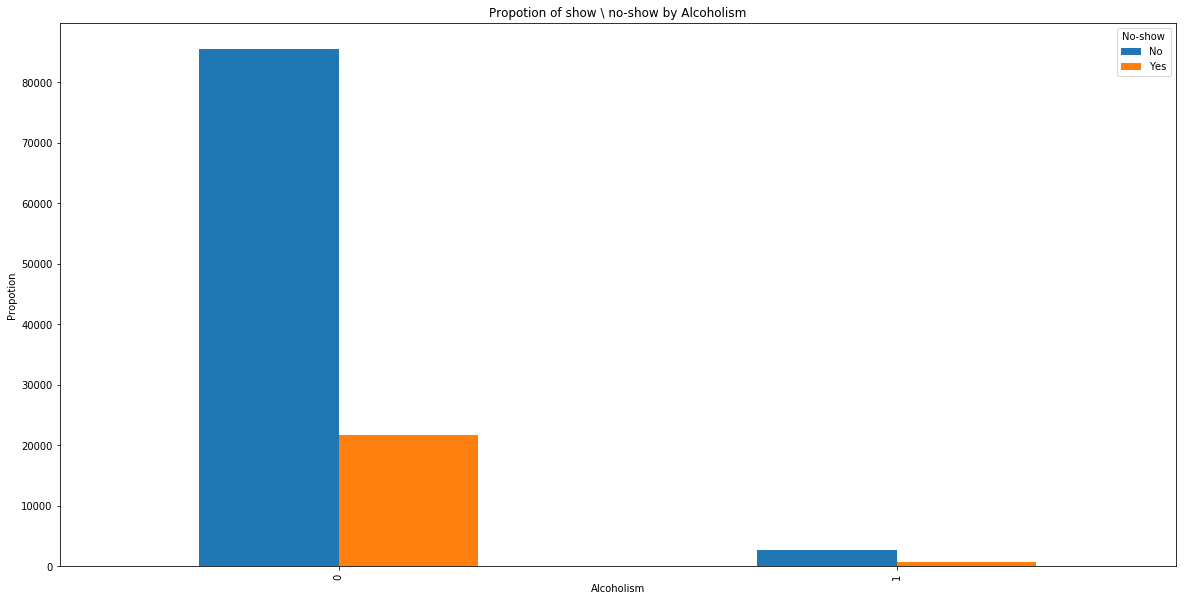

In [94]:
#show how Alcoholism affect on propotion show\no-show patients
plot_data('Alcoholism')

>> from this we can see that patient not Alcoholism show thier ScheduledDay more than others

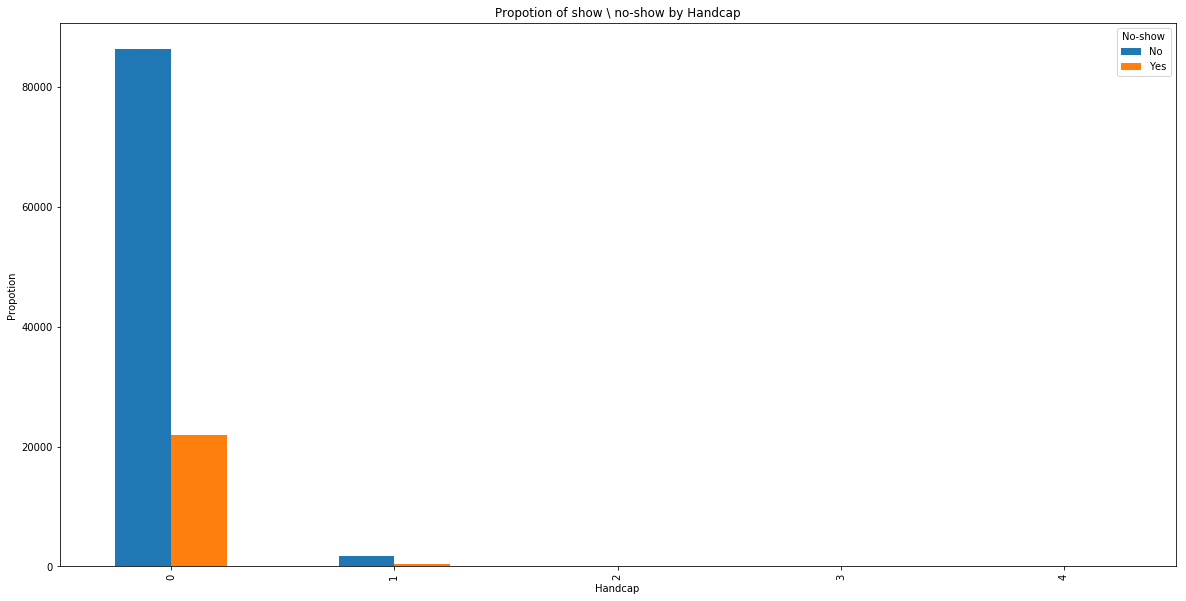

In [95]:
#show how Handcap affect on propotion show\no-show patients
plot_data('Handcap')

>> from this we can see that patient with no Handcap show thier ScheduledDay more than others

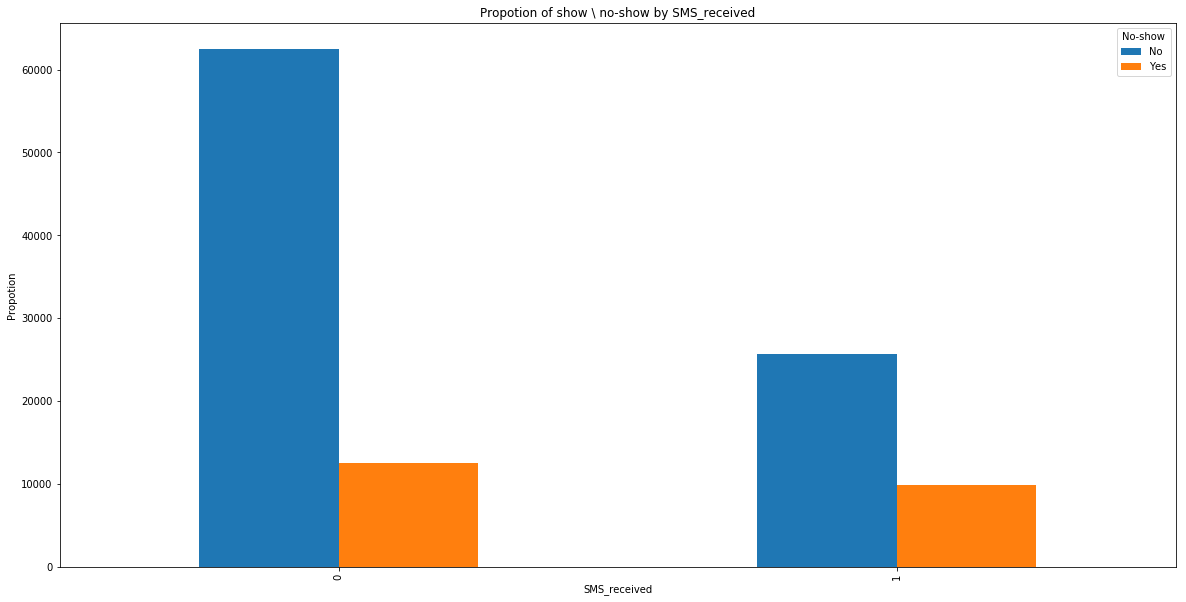

In [96]:
#show how SMS_received affect on propotion show\no-show patients
plot_data('SMS_received')

>> from this we can see that patient who received SMS show thier ScheduledDay more than others.

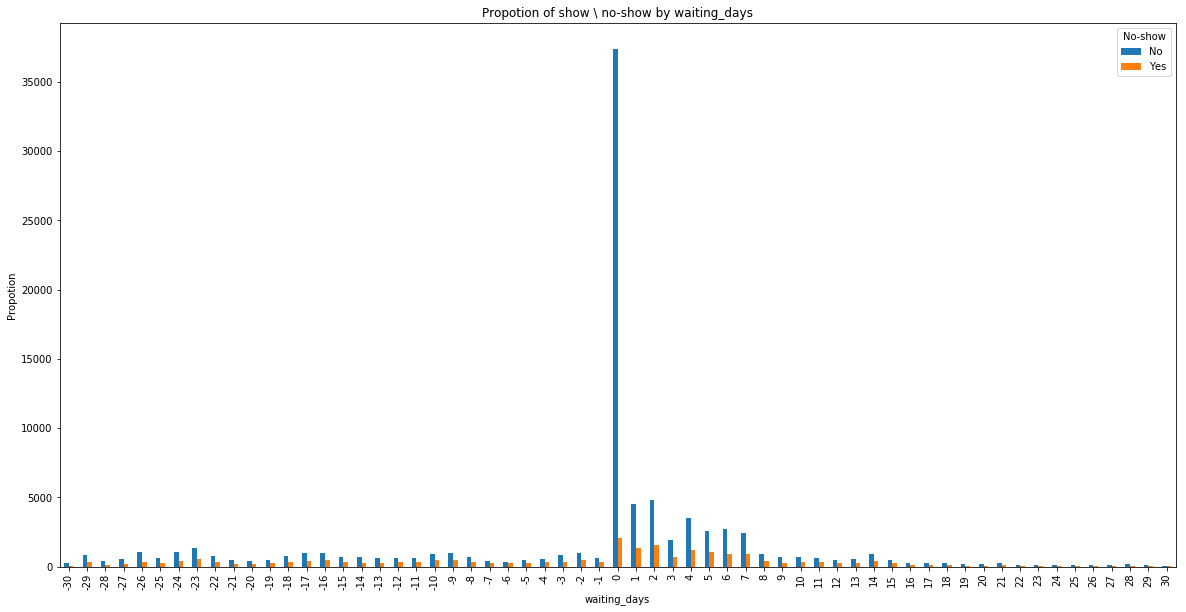

In [97]:
#show how waiting_days affect on propotion show\no-show patients
plot_data('waiting_days')

>> from this we can see that patient with no waiting_days show thier ScheduledDay more than others.

>from this analysis we can see that all this feature affects almost equally on our dataset and we can't say that one affect more than others.

### 2. what is the percent of patients who missed their scheduled appointment?
>we will calculate  how many patient missed the appointment, and show thw distribution of show / no-show patients.

In [98]:
#get the number of all appointments
all_appo=len(df.ScheduledDay)
all_appo

110526

In [99]:
##get the number of missed appointments
notattend=df[df['No-show']=="Yes"]
missed_appo =notattend.shape[0]
missed_appo

22319

the percent of patients who missed their scheduled appointment :  20.193438647919944


Text(0.5,1,'the distribution of show / no-show patients')

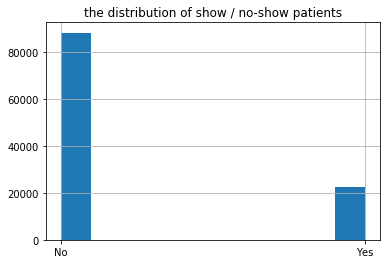

In [100]:
#get the percentage of missed appointments
missed_percent=missed_appo/all_appo*100
print("the percent of patients who missed their scheduled appointment : ",missed_percent)
df['No-show'].hist()
plt.title("the distribution of show / no-show patients")

#### from this analysis we can see that 20% of patients missed thier appointment

### 3. what is the gender distribution for show and no-show patients?
> we will discuss the gender distribution for show and no-show patient to know which gender show thier appointments more. and aslo know which gender missed thier appointments more.

Text(0.5,1,'the gender distribution of show / no-show patients')

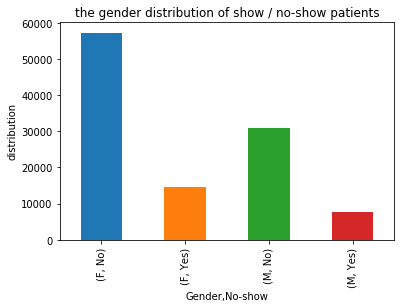

In [101]:
df.groupby(['Gender','No-show'])['Gender'].count().plot(kind='bar')
plt.ylabel("distribution")
plt.title("the gender distribution of show / no-show patients")

In [30]:
#calculate number of ech gender for show and no-show
df.groupby(['No-show'])['Gender'].value_counts()

No-show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

In [37]:
#calculate the percent of females who showed thier appointment
female_per=(57245/(57245+14594)*100)
#calculate the percent of males who showed thier appointment
male_per=(30962/(30962+7725)*100)
print("show female percent :",female_per )
print("show male percent :",male_per )

show female percent : 79.68512924734476
show male percent : 80.03205211052808


#### from this analysis we can see that females show thier appointment more than males , but also number of females who missed thier appointment  are more than males. we notice that the percentage of showed  females and male are almost equal. that's because that the number of all females is more than males

### 4. are there patients had more than one appointment?

In [102]:
df['PatientId'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
75797461494159     62
871374938638855    62
6264198675331      62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
14479974122994     46
65433599726992     46
81894521843749     42
9452745294842      42
188232341789524    40
2271579924275      38
9496196639835      38
13364929297498     37
1484143378533      35
88834999836575     34
986162815579582    34
712458866975343    33
416755661551767    30
6128878448536      30
81213966782532     29
8634164126317      24
1198157171975      23
                   ..
98683352133221      1
5394313945329       1
48689197872217      1
9675119787546       1
763619586595        1
867726299814126     1
77425139319169      1
39423418767468      1
961392519656997     1
737858311826761     1
271517596623238     1
8249496395977       1
137479426839        1
6529316371746       1
3212962263

In [49]:
df.query('PatientId==822145925426128').head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
3006,822145925426128,5638995,M,2016-04-29 08:38:44,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,No,0
3060,822145925426128,5642878,M,2016-04-29 18:02:42,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,No,0
3093,822145925426128,5640809,M,2016-04-29 11:27:34,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,No,0
6984,822145925426128,5705135,M,2016-05-16 18:38:11,2016-05-16,38,REDENÇÃO,0,0,0,0,0,0,No,0
6985,822145925426128,5668887,M,2016-05-06 09:54:32,2016-05-06,38,REDENÇÃO,0,0,0,0,0,0,No,0
7009,822145925426128,5735078,M,2016-05-24 16:56:06,2016-05-24,38,REDENÇÃO,0,0,0,0,0,0,No,0
7032,822145925426128,5710752,M,2016-05-17 17:47:53,2016-05-17,38,REDENÇÃO,0,0,0,0,0,0,No,0
7129,822145925426128,5736811,M,2016-05-25 08:48:46,2016-05-25,38,REDENÇÃO,0,0,0,0,0,0,No,0
7133,822145925426128,5711913,M,2016-05-18 08:13:00,2016-05-18,38,REDENÇÃO,0,0,0,0,0,0,No,0
7198,822145925426128,5682166,M,2016-05-10 15:56:47,2016-05-13,38,REDENÇÃO,0,0,0,0,0,0,No,3


> from this analysis we can see that there are some patients with multiple appointment. top 10 in range 88:55 appointment. we can see that this multiple appointments are in different dates , these appointments may be for each examination or each specialist visit.

### 5. how many patients whose thier ScheduledDay on the same day?

In [50]:
df.waiting_days.value_counts()

 0     39405
 2      6309
 1      5803
 4      4737
 6      3647
 5      3626
 7      3332
 3      2609
-23     1863
-24     1450
-16     1446
-2      1425
-9      1409
-17     1379
-26     1332
 14     1317
-10     1313
 8      1287
-3      1184
-29     1174
-22     1118
 10     1078
-18     1052
-8      1025
-15     1003
-11      986
 11      972
 9       948
-12      946
-14      939
       ...  
-1       922
-25      880
-4       857
-5       792
 13      779
 12      730
-19      725
-27      696
 15      675
-7       647
-21      642
-6       605
-20      561
-28      529
 16      407
 21      348
 17      332
 18      307
-30      270
 28      250
 19      243
 20      231
 22      184
 29      161
 24      157
 23      137
 25      137
 27      133
 26      131
 30       20
Name: waiting_days, Length: 61, dtype: int64

In [52]:
df.groupby(['No-show'])['waiting_days'].value_counts()

No-show  waiting_days
No        0              37381
          2               4767
          1               4479
          4               3538
          6               2721
          5               2597
          7               2436
          3               1906
         -23              1334
         -24              1081
         -26              1019
         -17               996
         -9                973
         -2                953
         -16               945
          8                907
          14               903
         -10               868
         -29               863
         -3                841
         -22               779
         -18               730
          10               720
         -15               695
          9                684
         -8                667
         -14               655
         -13               643
          11               642
         -11               636
                         ...  
Yes      -14     

#### yes, there are patients who had thier ScheduledDay in the same day. almost 40000 of patients had thier ScheduledDay in the same day and almost 38000 of them showed thier appointment.

## Conclusions
after this analysis there are some Conclusions :
 1.  On average, The patients are 37 years . and most of them are less than 55 years old.
 2.  Most of patients are not alcoholics.
 3.  Most of the patients has not diabetes.
 4.  Most of the patients are not handicaped.
 5.  Most of the patients has not Hipertension.
 5.  Most of the patients recieved SMS for thier appointment.
 7.  20% of the appointments were missed.
 8.  Almost 40000 of patients has thier ScheduledDay on the same day.
 9.  There are some patients who had multiple appointment
 10.  There are some important factors to know in order to predict if a patient will show up for their scheduled appointment such as : ( Age ,Scholarship ,Hipertension ,Diabetes ,Alcoholism ,Handcap ,Gender ,SMS_received ,waiting_days)






### Limitations
1. the range of patient's ages reaches to 115 and there are poeople with 0 age  which might have adversely affected this analysis. 
2. Although we could see  that number of females who showed thier appointment more than males but we couldn't say that this affect as the number of females in all data is more males

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0